# Project Block 2: Advanced Statistics
## Part 2 - Forecasting Queretaro industrial activity
Fabián González Vera A01367585

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import statistics as st


## ARIMA(p,d,q)SARIMA(P,D,Q,#p)
---

<Axes: xlabel='Periodos'>

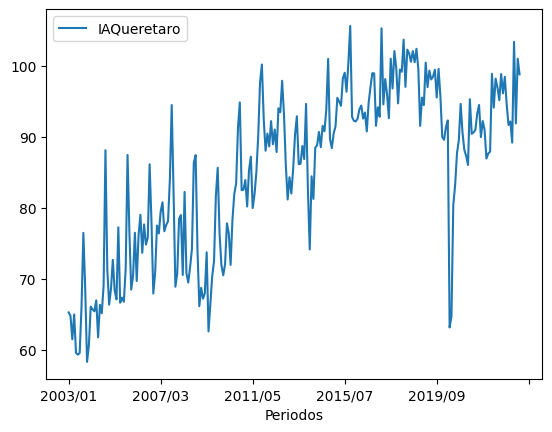

In [4]:
IAQ = pd.read_csv('Indicadores20231012110325.csv')
IAQ=IAQ.set_index(['Periodos'])
IAQ.plot()

In [5]:
IAQ

,IAQueretaro
Periodos,
2003/01,65.234491
2003/02,64.750420
2003/03,61.444991
2003/04,64.953065
2003/05,59.522348
...,...
2023/02,89.168194
2023/03,103.384331
2023/04,91.876916


(NULL) H0: |φ_1| = 1  => La serie es No Estacionaria <br>
(ALT)  H1: |φ| < 1   => Es Estacionaria

In [6]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
adfuller(IAQ['IAQueretaro'])
#pvalue 

(-1.851478608294208,
 0.3552197579633277,
 12,
 233,
 {'1%': -3.458731141928624,
  '5%': -2.8740258764297293,
  '10%': -2.5734243167124093},
 1337.7627644603779)

The pvalue returned by the Dickey-Fuller test is 0.3552197579633277 and is greater than 0.05.

In [7]:
IAQ['lIndAct'] = np.log(IAQ['IAQueretaro'])
IAQ['diff'] = diff(IAQ['lIndAct'])
# log - log shift 12
IAQ['diff12'] = IAQ['lIndAct'] - IAQ['lIndAct'].shift(12)
IAQ

,IAQueretaro,lIndAct,diff,diff12
Periodos,,,,
2003/01,65.234491,4.177988,NaN,NaN
2003/02,64.750420,4.170540,-0.007448,NaN
2003/03,61.444991,4.118142,-0.052398,NaN
2003/04,64.953065,4.173665,0.055523,NaN
2003/05,59.522348,4.086352,-0.087313,NaN
...,...,...,...,...
2023/02,89.168194,4.490524,-0.032917,0.014323
2023/03,103.384331,4.638453,0.147929,0.044631
2023/04,91.876916,4.520450,-0.118004,-0.023967


<Axes: xlabel='Periodos'>

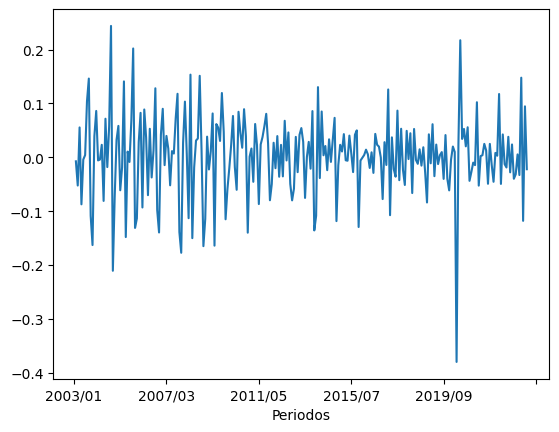

In [8]:
IAQ['diff'].plot()

In [9]:
adfuller(IAQ['diff'].dropna())

(-5.59950720812746,
 1.2742843914982816e-06,
 11,
 233,
 {'1%': -3.458731141928624,
  '5%': -2.8740258764297293,
  '10%': -2.5734243167124093},
 -672.4921025082533)

In [10]:
adfuller(IAQ['lIndAct'].dropna())

(-2.0402700406367766,
 0.269199852269532,
 12,
 233,
 {'1%': -3.458731141928624,
  '5%': -2.8740258764297293,
  '10%': -2.5734243167124093},
 -677.3859088725994)

is stationary

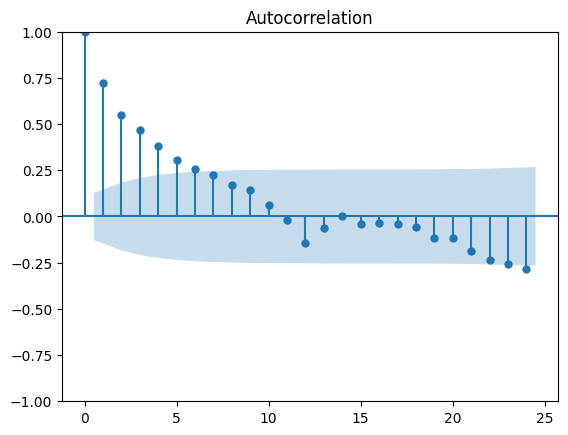

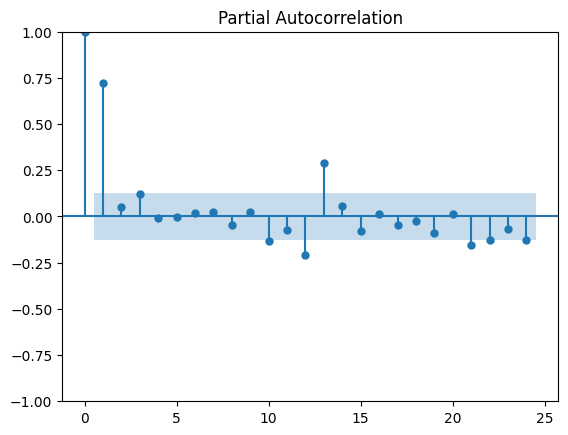

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(IAQ['diff12'].dropna())
plot_pacf(IAQ['diff12'].dropna())
plt.show()

In [12]:
#q=0,p=1 P=1, (d=1,D=0)

#
from statsmodels.tsa.arima.model import ARIMA

endog = IAQ['lIndAct']
#order = (p,d,q), seasonal_order= (P,D,Q,s)
model=ARIMA(endog, order=(1, 0, 0), seasonal_order=(1,0,0,12))
res=model.fit()
res.summary()

d:\Principal\Workspace\Python\py3114\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
d:\Principal\Workspace\Python\py3114\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Principal\Workspace\Python\py3114\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
d:\Principal\Workspace\Python\py3114\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                          lIndAct   No. Observations:                  246
Model:             ARIMA(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                 363.221
Date:                          Mon, 16 Oct 2023   AIC                           -718.442
Time:                                  23:21:48   BIC                           -704.421
Sample:                                       0   HQIC                          -712.796
                                          - 246                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4192      0.048     91.930      0.000       4.325       4.513
ar.L1          0.7995      0.034     23.719      0.000       0.733       0.866
ar.S.L12       0.6747      0.034     20.000      0.000       0.609       0.741
sigma2         0.0030      0.000     23.062      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   1.59   Jarque-Bera (JB):               758.25
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                            -1.00
Prob(H) (two-sided):                  0.53   Kurtosis:                        11.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

d:\Principal\Workspace\Python\py3114\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Principal\Workspace\Python\py3114\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


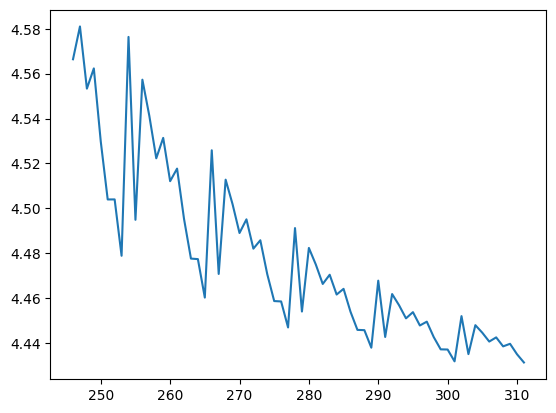

In [13]:
plt.plot(res.forecast(66))